<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Introdução ao problema de negócios;</li>
  <li>Exploração de dados.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Na análise abaixo observamos a quantidade de entregas separadas e definidas por regiões.

## 2\. Pacotes e bibliotecas

In [ ]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.

...

In [1]:
import json
import pandas as pd
import seaborn as sns

## 3\. Exploração de dados

In [2]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.

In [3]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json' -O deliveries.json

In [4]:
with open('deliveries.json',mode='r',encoding='utf8') as file:
  data= json.load(file)

In [5]:
df = pd.DataFrame(data)
df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [6]:
origin_df = pd.json_normalize(df["origin"])
origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [7]:
uniao_df_origin = pd.merge(left=df, right=origin_df, how='inner', left_index=True, right_index=True)
df_new = uniao_df_origin.drop("origin", axis = 1)
df_new = df_new[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
df_new.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [8]:
deliveries_exploded_df = df_new[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [9]:
deliveries_normalized_df = pd.concat([
 pd.DataFrame(deliveries_exploded_df["deliveries"].apply(
 lambda record: record["size"])
).rename(columns={"deliveries": "delivery_size"}),
 pd.DataFrame(deliveries_exploded_df["deliveries"].apply(
 lambda record: record["point"]["lng"])
).rename(columns={"deliveries": "delivery_lng"}),
 pd.DataFrame(deliveries_exploded_df["deliveries"].apply(
 lambda record: record["point"]["lat"])
).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_normalized_df.head()


,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [10]:
deliveries_df = df_new.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


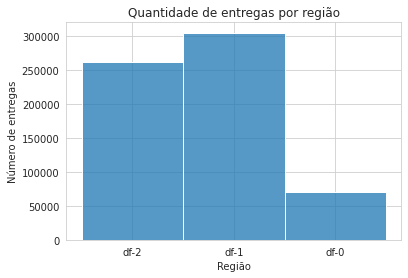

In [21]:
grafico_regiao = deliveries_df[['region']]

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=deliveries_df, x='region')
  grafico.set(title='Quantidade de entregas por região', xlabel='Região', ylabel='Número de entregas');


No gráfico acima podemos ver a quantidade de entregas separadas por região, a região df-1 é a região com o maior número de entregas, seguida pela região df-2. A região df-0 é a região com menos entrega, tendo um número de entregas muiyo inferior ao número de entregas da outras regiões.